In [1]:
import sympy
from sympy import *
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as st
import seaborn as sns
import scipy.stats as stats

V1(v)= 0.1095915745277127 + 0.9621554324636283 v +- w0
u0 =  0.0809327654869210
w0 =  0.162885283818977


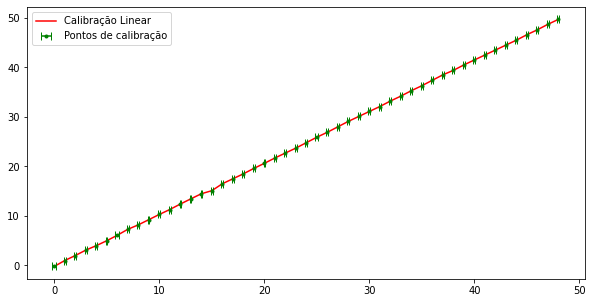

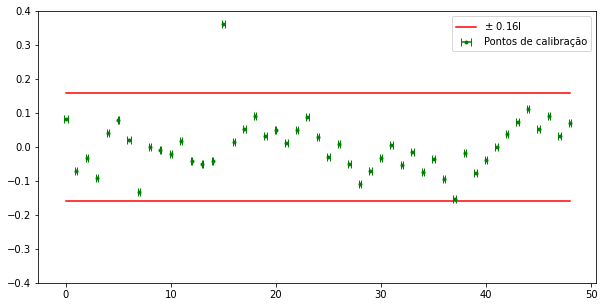

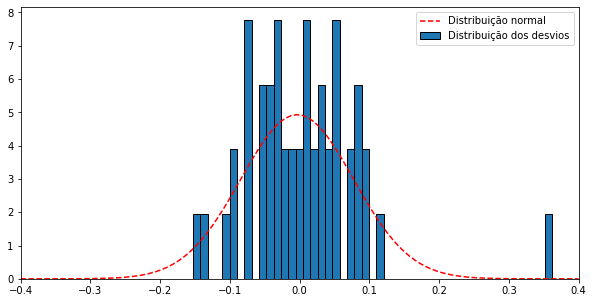

In [2]:
# Com todas as medições, função de 1° grau

y_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 15.1, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

S = 0
S_x = 0
S_y = 0
S_xx = 0
S_xy = 0
for i in range(0, 48):
    S += 1/(Sigma_i[i]**2)
    S_x += x_i[i]/(Sigma_i[i]**2)
    S_y += y_i[i]/(Sigma_i[i]**2)
    S_xx += (x_i[i]**2)/(Sigma_i[i]**2)
    S_xy += (x_i[i]*y_i[i])/(Sigma_i[i]**2)

delta = (S*S_xx)-(S_x**2)
a = ((S_y*S_xx)-(S_x*S_xy))/(delta)
b = ((S*S_xy)-(S_x*S_y))/(delta)
print("V1(v)=", a,"+",b,"v +- w0")

def p(x):
    return a + b*x

vn = []
for i in range(49):
    vn.append(p(x_i[i]))
    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_48 = 2.0126

Vn_vi = []
di = []

for i in range(0, 48):
    Vn_vi = a+b*x_i[i]
    di = Vn_vi-y_i[i]
    di_2 += di**2

u0 = sqrt(di_2/48)
w0 = u0*t_48
w1 = np.array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16])
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos
    
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i,x_i,label='Calibração Linear',color='red')
plt.errorbar(y_i,x_i,xerr=Sigma_i,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di=vn-y_i

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i,-di,xerr=Sigma_i,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i,w1,label='$\pm$ 0.16l',color='red')
plt.plot(y_i,-w1,color='red')
plt.legend()
plt.show()

plt.figure()
plt.xlim([-.4,.4])
plt.hist(-di,bins = len(di), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di)
desv = 0.0809327654869210
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show() 

V1(v)= 0.09948172834110212 + 0.9623574936066308 v +- w0
u0 =  0.0621564994914234
w0 =  0.125161435200905


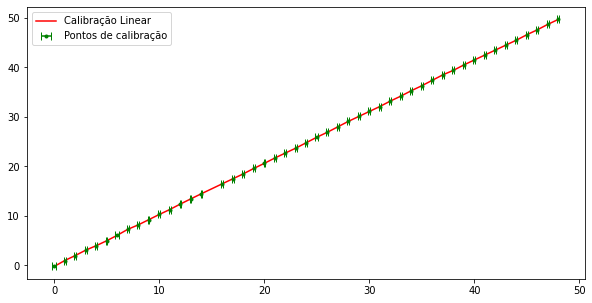

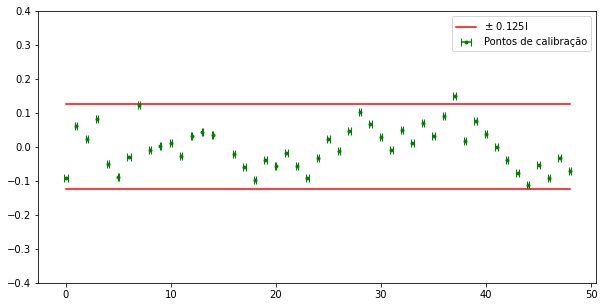

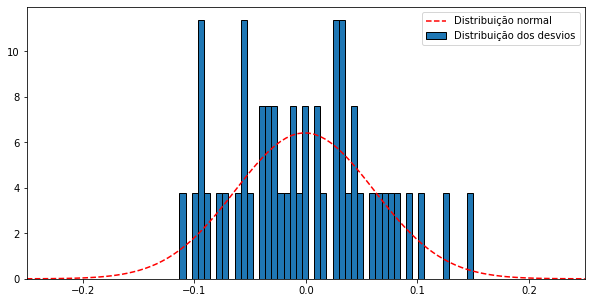

In [3]:
# Sem a medição 15, função de 1° grau

y_i_2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_2 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_2 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

S = 0
S_x = 0
S_y = 0
S_xx = 0
S_xy = 0

for i in range(0, 47):
    S += 1/(Sigma_i_2[i]**2)
    S_x += x_i_2[i]/(Sigma_i_2[i]**2)
    S_y += y_i_2[i]/(Sigma_i_2[i]**2)
    S_xx += (x_i_2[i]**2)/(Sigma_i_2[i]**2)
    S_xy += (x_i_2[i]*y_i_2[i])/(Sigma_i_2[i]**2)

delta_2 = (S*S_xx)-(S_x**2)
a_2 = ((S_y*S_xx)-(S_x*S_xy))/(delta_2)
b_2 = ((S*S_xy)-(S_x*S_y))/(delta_2)
print("V1(v)=", a_2,"+",b_2,"v +- w0")

def p_2(x):
    return a_2 + b_2*x

vn_2 = []
for i in range(48):
    vn_2.append(p_2(x_i_2[i]))

    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_47 = 2.01365

for i in range(0, 47):
    Vn_vi = a_2+b_2*x_i_2[i]
    di = Vn_vi-y_i_2[i]
    di_2 += di**2
    
u0 = sqrt(di_2/47)
w0 = u0*t_47
w2 = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_2,x_i_2,label='Calibração Linear',color='red')
plt.errorbar(y_i_2,x_i_2,xerr=Sigma_i_2,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_2=vn_2-y_i_2

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_2,di_2,xerr=Sigma_i_2,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_2,w2,label='$\pm$ 0.125l',color='red')
plt.plot(y_i_2,-w2,color='red')
plt.legend(loc ='upper right')
plt.show()

plt.figure()
plt.xlim([-.25,.25])
plt.hist(di_2,bins = len(di_2), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di_2)
desv = 0.0621564994914234
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show()

V5(v)= 0.156211242946783 + 0.936344755152607 v + 0.00319183503256224 v² -0.000148171561584265 v³ + 2.78411414557943e-6 v⁴ -1.75871627311047e-8 v⁵ +- w0
u0 =  0.0721366488934347
w0 =  0.145182219562927


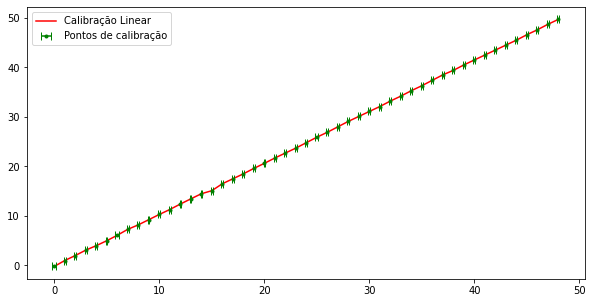

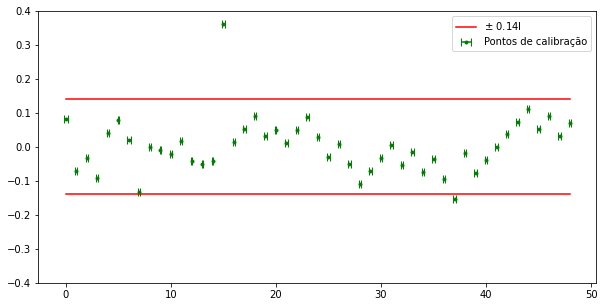

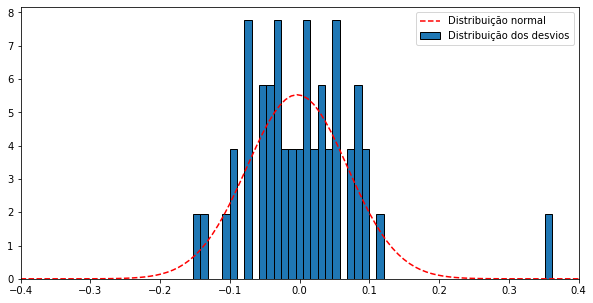

In [10]:
# Com todas as medições, função de 5° grau

y_i_5 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_5 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 15.1, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_5 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
y_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Somatório de todos os valores de C

C11 = 0
C12 = 0
C13 = 0
C14 = 0
C15 = 0
C16 = 0
C17 = 0
C21 = 0
C22 = 0
C23 = 0
C24 = 0
C25 = 0
C26 = 0
C27 = 0
C31 = 0
C32 = 0
C33 = 0
C34 = 0
C35 = 0
C36 = 0
C37 = 0
C41 = 0
C42 = 0
C43 = 0
C44 = 0
C45 = 0
C46 = 0
C47 = 0
C51 = 0
C52 = 0
C53 = 0
C54 = 0
C55 = 0
C56 = 0
C57 = 0
C61 = 0
C62 = 0
C63 = 0
C64 = 0
C65 = 0
C66 = 0
C67 = 0

for i in range(0, 48):
    C11 += y_i[i]/(Sigma_i[i]**2)
    C12 += 1/(Sigma_i[i]**2)
    C13 += x_i[i]/(Sigma_i[i]**2)
    C14 += x_i[i]**2/(Sigma_i[i]**2)
    C15 += x_i[i]**3/(Sigma_i[i]**2)
    C16 += x_i[i]**4/(Sigma_i[i]**2)
    C17 += x_i[i]**5/(Sigma_i[i]**2)
    C21 += y_i[i]*x_i[i]/(Sigma_i[i]**2)
    C22 += x_i[i]/(Sigma_i[i]**2)
    C23 += x_i[i]**2/(Sigma_i[i]**2)
    C24 += x_i[i]**3/(Sigma_i[i]**2)
    C25 += x_i[i]**4/(Sigma_i[i]**2)
    C26 += x_i[i]**5/(Sigma_i[i]**2)
    C27 += x_i[i]**6/(Sigma_i[i]**2)
    C31 += y_i[i]*x_i[i]**2/(Sigma_i[i]**2)
    C32 += x_i[i]**2/(Sigma_i[i]**2)
    C33 += x_i[i]**3/(Sigma_i[i]**2)
    C34 += x_i[i]**4/(Sigma_i[i]**2)
    C35 += x_i[i]**5/(Sigma_i[i]**2)
    C36 += x_i[i]**6/(Sigma_i[i]**2)
    C37 += x_i[i]**7/(Sigma_i[i]**2)
    C41 += y_i[i]*x_i[i]**3/(Sigma_i[i]**2)
    C42 += x_i[i]**3/(Sigma_i[i]**2)
    C43 += x_i[i]**4/(Sigma_i[i]**2)
    C44 += x_i[i]**5/(Sigma_i[i]**2)
    C45 += x_i[i]**6/(Sigma_i[i]**2)
    C46 += x_i[i]**7/(Sigma_i[i]**2)
    C47 += x_i[i]**8/(Sigma_i[i]**2)
    C51 += y_i[i]*x_i[i]**4/(Sigma_i[i]**2)
    C52 += x_i[i]**4/(Sigma_i[i]**2)
    C53 += x_i[i]**5/(Sigma_i[i]**2)
    C54 += x_i[i]**6/(Sigma_i[i]**2)
    C55 += x_i[i]**7/(Sigma_i[i]**2)
    C56 += x_i[i]**8/(Sigma_i[i]**2)
    C57 += x_i[i]**9/(Sigma_i[i]**2)
    C61 += y_i[i]*x_i[i]**5/(Sigma_i[i]**2)
    C62 += x_i[i]**5/(Sigma_i[i]**2)
    C63 += x_i[i]**6/(Sigma_i[i]**2)
    C64 += x_i[i]**7/(Sigma_i[i]**2)
    C65 += x_i[i]**8/(Sigma_i[i]**2)
    C66 += x_i[i]**9/(Sigma_i[i]**2)
    C67 += x_i[i]**10/(Sigma_i[i]**2)
    
a0, a1, a2, a3, a4, a5 = var('a0,a1,a2,a3,a4,a5')
Eq = (C12*a0 + C13*a1 + C14*a2 + C15*a3 + C16*a4 + C17*a5 - C11, C22*a0 + C23*a1 + C24*a2 + C25*a3 + C26*a4 + C27*a5 - C21, C32*a0 + C33*a1 + C34*a2 + C35*a3 + C36*a4 + C37*a5 - C31, C42*a0 + C43*a1 + C44*a2 + C45*a3 + C46*a4 + C47*a5 - C41, C52*a0 + C53*a1 + C54*a2 + C55*a3 + C56*a4 + C57*a5 - C51, C62*a0 + C63*a1 + C64*a2 + C65*a3 + C66*a4 + C67*a5 - C61)
sist = linsolve(Eq,a0,a1,a2,a3,a4,a5)
a0, a1, a2, a3, a4, a5 = next(iter(sist))

def p_5(x):
    return a0 + a1*x+a2*x**2+a3*x**3+a5*x**4+a5*x**5

vn_5 = []
for i in range(49):
    vn_5.append(p(x_i_5[i]))

# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_48 = 2.0126

Vn_vi = []
di = []

for i in range(0, 48):
    Vn_vi = a0 + a1*x_i_5[i]+a2*x_i_5[i]**2+a3*x_i_5[i]**3+a4*x_i_5[i]**4+a5*x_i_5[i]**5
    di = Vn_vi-y_i_5[i]
    di_2 += di**2
    
u0 = sqrt(di_2/48)
w0 = u0*t_48

w5 = np.array([0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14])
print("V5(v)=", a0,"+",a1,"v +",a2,"v²",a3,"v³ +",a4,"v⁴",a5,"v⁵ +- w0")
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos
    
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_5,x_i_5,label='Calibração Linear',color='red')
plt.errorbar(y_i_5,x_i_5,xerr=Sigma_i_5,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_5=vn_5-y_i_5

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_5,-di_5,xerr=Sigma_i_5,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_5,w5,label='$\pm$ 0.14l',color='red')
plt.plot(y_i_5,-w5,color='red')
plt.legend()
plt.show()

plt.figure()
plt.xlim([-.4,.4])
plt.hist(-di_5,bins = len(di_5), density = True,edgecolor="black",label="Distribuição dos desvios")
xmin,xmax = plt.xlim()
med = st.mean(di_5)
desv = 0.0721366488934347
eix = np.linspace(xmin,xmax,100)
eiy = norm.pdf(eix,med,desv)
plt.plot(eix,eiy,color='red', label="Distribuição normal", linestyle="--")
plt.legend()
plt.show() 

V5(v)= 0.148155974981042 + 0.941239905683787 v + 0.00243424651035500 v² -0.000102663044692837 v³ + 1.63382239751815e-6 v⁴ -7.32676641700420e-9 v⁵ +- w0
u0 =  0.0513948393250812
w0 =  0.103491218206950


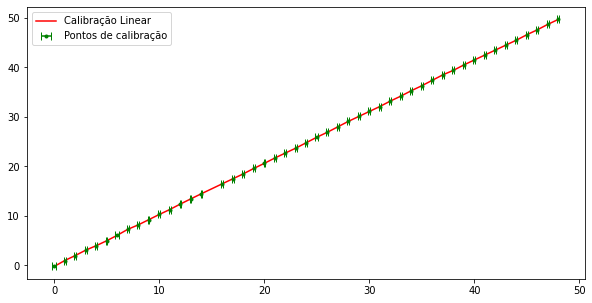

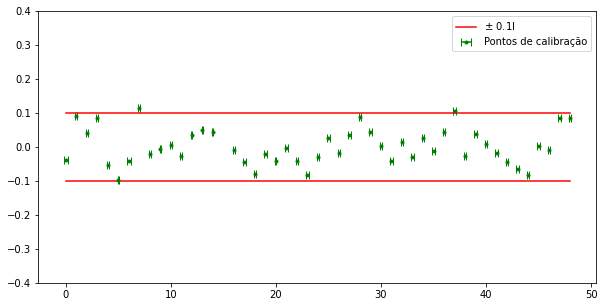

In [5]:
# Sem a medição 15, função de 5° grau
y_i_6 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i_6 = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i_6 = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
y_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x_i = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
Sigma_i = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Somatório de todos os valores de C

C11 = 0
C12 = 0
C13 = 0
C14 = 0
C15 = 0
C16 = 0
C17 = 0
C21 = 0
C22 = 0
C23 = 0
C24 = 0
C25 = 0
C26 = 0
C27 = 0
C31 = 0
C32 = 0
C33 = 0
C34 = 0
C35 = 0
C36 = 0
C37 = 0
C41 = 0
C42 = 0
C43 = 0
C44 = 0
C45 = 0
C46 = 0
C47 = 0
C51 = 0
C52 = 0
C53 = 0
C54 = 0
C55 = 0
C56 = 0
C57 = 0
C61 = 0
C62 = 0
C63 = 0
C64 = 0
C65 = 0
C66 = 0
C67 = 0

for i in range(0, 47):
    C11 += y_i[i]/(Sigma_i[i]**2)
    C12 += 1/(Sigma_i[i]**2)
    C13 += x_i[i]/(Sigma_i[i]**2)
    C14 += x_i[i]**2/(Sigma_i[i]**2)
    C15 += x_i[i]**3/(Sigma_i[i]**2)
    C16 += x_i[i]**4/(Sigma_i[i]**2)
    C17 += x_i[i]**5/(Sigma_i[i]**2)
    C21 += y_i[i]*x_i[i]/(Sigma_i[i]**2)
    C22 += x_i[i]/(Sigma_i[i]**2)
    C23 += x_i[i]**2/(Sigma_i[i]**2)
    C24 += x_i[i]**3/(Sigma_i[i]**2)
    C25 += x_i[i]**4/(Sigma_i[i]**2)
    C26 += x_i[i]**5/(Sigma_i[i]**2)
    C27 += x_i[i]**6/(Sigma_i[i]**2)
    C31 += y_i[i]*x_i[i]**2/(Sigma_i[i]**2)
    C32 += x_i[i]**2/(Sigma_i[i]**2)
    C33 += x_i[i]**3/(Sigma_i[i]**2)
    C34 += x_i[i]**4/(Sigma_i[i]**2)
    C35 += x_i[i]**5/(Sigma_i[i]**2)
    C36 += x_i[i]**6/(Sigma_i[i]**2)
    C37 += x_i[i]**7/(Sigma_i[i]**2)
    C41 += y_i[i]*x_i[i]**3/(Sigma_i[i]**2)
    C42 += x_i[i]**3/(Sigma_i[i]**2)
    C43 += x_i[i]**4/(Sigma_i[i]**2)
    C44 += x_i[i]**5/(Sigma_i[i]**2)
    C45 += x_i[i]**6/(Sigma_i[i]**2)
    C46 += x_i[i]**7/(Sigma_i[i]**2)
    C47 += x_i[i]**8/(Sigma_i[i]**2)
    C51 += y_i[i]*x_i[i]**4/(Sigma_i[i]**2)
    C52 += x_i[i]**4/(Sigma_i[i]**2)
    C53 += x_i[i]**5/(Sigma_i[i]**2)
    C54 += x_i[i]**6/(Sigma_i[i]**2)
    C55 += x_i[i]**7/(Sigma_i[i]**2)
    C56 += x_i[i]**8/(Sigma_i[i]**2)
    C57 += x_i[i]**9/(Sigma_i[i]**2)
    C61 += y_i[i]*x_i[i]**5/(Sigma_i[i]**2)
    C62 += x_i[i]**5/(Sigma_i[i]**2)
    C63 += x_i[i]**6/(Sigma_i[i]**2)
    C64 += x_i[i]**7/(Sigma_i[i]**2)
    C65 += x_i[i]**8/(Sigma_i[i]**2)
    C66 += x_i[i]**9/(Sigma_i[i]**2)
    C67 += x_i[i]**10/(Sigma_i[i]**2)
    
a0, a1, a2, a3, a4, a5 = var('a0,a1,a2,a3,a4,a5')
Eq = (C12*a0 + C13*a1 + C14*a2 + C15*a3 + C16*a4 + C17*a5 - C11, C22*a0 + C23*a1 + C24*a2 + C25*a3 + C26*a4 + C27*a5 - C21, C32*a0 + C33*a1 + C34*a2 + C35*a3 + C36*a4 + C37*a5 - C31, C42*a0 + C43*a1 + C44*a2 + C45*a3 + C46*a4 + C47*a5 - C41, C52*a0 + C53*a1 + C54*a2 + C55*a3 + C56*a4 + C57*a5 - C51, C62*a0 + C63*a1 + C64*a2 + C65*a3 + C66*a4 + C67*a5 - C61)
sist = linsolve(Eq,a0,a1,a2,a3,a4,a5)
a0, a1, a2, a3, a4, a5 = next(iter(sist))

def p_6(x):
    return a0 + a1*x+a2*x**2+a3*x**3+a4*x**4+a5*x**5

vn_6 = []
for i in range(48):
    vn_6.append(p_6(x_i_6[i]))
    
# Cálculo da incerteza

Vn_vi = 0
di = 0
di_2 = 0
t_47 = 2.01365

for i in range(0, 47):
    Vn_vi = a0 + a1*x_i_6[i]+a2*x_i_6[i]**2+a3*x_i_6[i]**3+a4*x_i_6[i]**4+a5*x_i_6[i]**5
    di = Vn_vi-y_i_6[i]
    di_2 += di**2
    
u0 = sqrt(di_2/47)
w0 = u0*t_47
w6 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
print("V5(v)=", a0,"+",a1,"v +",a2,"v²",a3,"v³ +",a4,"v⁴",a5,"v⁵ +- w0")
print("u0 = ", u0)
print("w0 = ", w0)

# Plotagem dos gráficos

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.plot(y_i_6,x_i_6,label='Calibração Linear',color='red')
plt.errorbar(y_i_6,x_i_6,xerr=Sigma_i_6,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.legend()
plt.show()

di_6=vn_6-y_i_6

plt.figure()
plt.ylim([-.4,.4])
plt.errorbar(y_i_6,di_6,xerr=Sigma_i_6,fmt='.', capsize=4, label='Pontos de calibração',color='green')
plt.plot(y_i_6,w6,label='$\pm$ 0.1l',color='red')
plt.plot(y_i_6,-w6,color='red')
plt.legend(loc ='upper right')
plt.show()


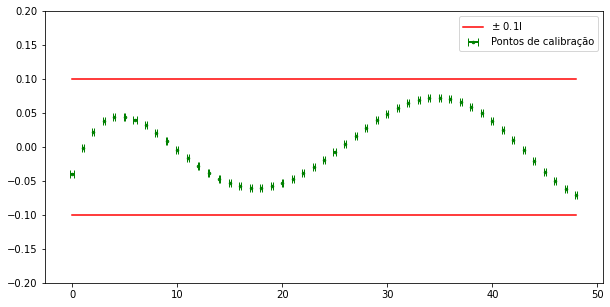

In [17]:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
x = np.array([-0.2, 1, 2, 3.1, 4, 5, 6.1, 7.3, 8.2, 9.25, 10.3, 11.3, 12.4, 13.45, 14.48, 15.1, 16.5, 17.5, 18.5, 19.6, 20.62, 21.7, 22.7, 23.7, 24.8, 25.9, 26.9, 28, 29.1, 30.1, 31.1, 32.1, 33.2, 34.2, 35.3, 36.3, 37.4, 38.5, 39.4, 40.5, 41.5, 42.5, 43.5, 44.5, 45.5, 46.6, 47.6, 48.7, 49.7])
di = np.array([0.2, 0.1, 0.1, 0.1, 0.1, 0.05, 0.2, 0.1, 0.1, 0.05, 0.1, 0.1, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.1, 0.1, 0.1, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

a=np.polyfit(x,y,1)
p = np.poly1d(a)
a2=np.polyfit(x,y,5)
p2 = np.poly1d(a2)

x = []
y = []
x5 = []
y5 = []
for i in range(len(X)):
    x.append(i+1-1)
    calc = p(i+1-1)
    y.append(calc)
    x5.append(i+1-1)
    calc = p2(i+1-1)
    y5.append(calc)


di5= []
zip_object = zip(y, y5)
for y_i, y5_i in zip_object:
    di5.append(y_i-y5_i)

plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure()
plt.ylim([-.2,.2])
plt.errorbar(x,di5,xerr=di,fmt='.', markersize='5', capsize=4, elinewidth=2,label='Pontos de calibração',color='green')
plt.plot(x,w,label='$\pm$ 0.1l',color='red')
plt.plot(x,-w,color='red')
plt.legend(loc ='upper right')
plt.show()